In [155]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [157]:
data = pd.read_csv('Financial_inclusion_dataset.csv')
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [158]:
ds = data.copy()

In [159]:
ds.drop('uniqueid',axis = 1, inplace = True)

In [160]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   bank_account            23524 non-null  object
 3   location_type           23524 non-null  object
 4   cellphone_access        23524 non-null  object
 5   household_size          23524 non-null  int64 
 6   age_of_respondent       23524 non-null  int64 
 7   gender_of_respondent    23524 non-null  object
 8   relationship_with_head  23524 non-null  object
 9   marital_status          23524 non-null  object
 10  education_level         23524 non-null  object
 11  job_type                23524 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.2+ MB


In [161]:
ds.isnull().sum()

country                   0
year                      0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [162]:
ds.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23524, dtype: bool

In [163]:
ds.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [164]:
# display(ds[num].head())


cat = ds.select_dtypes(exclude = "number")
num = ds.select_dtypes(include = 'number')

print('Numerical Data')
display(num.head())
print(f'\n\nCategorical Date')
display(cat.head())

Numerical Data


,year,household_size,age_of_respondent
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26




Categorical Date


,country,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [165]:
columns_to_scale = []
for i in num.columns:
    if ds[i].describe()[2] > 1500:
        columns_to_scale.append(i)

columns_to_scale

[]

In [166]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

encoded = {}

for i in ds.select_dtypes(exclude = 'number'):
    encoder = LabelEncoder()
    ds[i] = encoder.fit_transform(ds[i])
    encoded[i + '_encoder'] = encoder
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

encoded

{'country_encoder': LabelEncoder(),
 'bank_account_encoder': LabelEncoder(),
 'location_type_encoder': LabelEncoder(),
 'cellphone_access_encoder': LabelEncoder(),
 'gender_of_respondent_encoder': LabelEncoder(),
 'relationship_with_head_encoder': LabelEncoder(),
 'marital_status_encoder': LabelEncoder(),
 'education_level_encoder': LabelEncoder(),
 'job_type_encoder': LabelEncoder()}

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

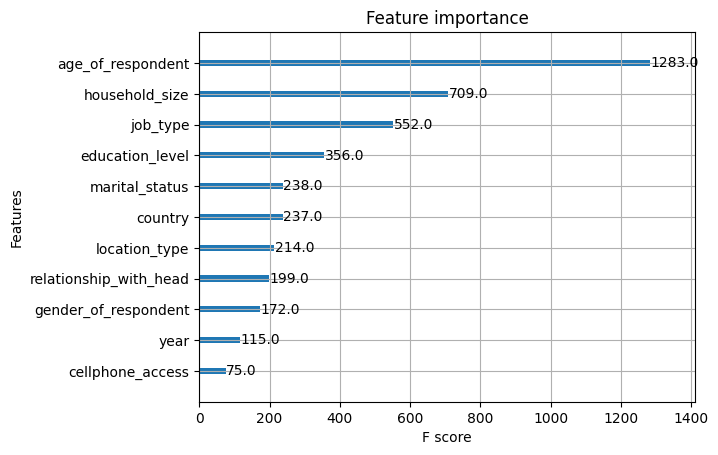

In [167]:
# conduct Feature Selection
# - Using XGBOOST to find feature importance

import matplotlib.pyplot as plt
import xgboost as xgb

model = xgb.XGBClassifier()


x = ds.drop('bank_account', axis = 1)
y = ds.bank_account

model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model, importance_type = 'weight')

In [168]:
ds.columns

Index(['country', 'year', 'bank_account', 'location_type', 'cellphone_access',
       'household_size', 'age_of_respondent', 'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type'],
      dtype='object')

In [169]:
sel_cols = ['age_of_respondent','household_size','job_type','education_level','marital_status','country','location_type','relationship_with_head','bank_account']
ds = ds[sel_cols]
ds.head()

,age_of_respondent,household_size,job_type,education_level,marital_status,country,location_type,relationship_with_head,bank_account
0,24,3,9,3,2,0,0,5,1
1,70,5,4,0,4,0,0,1,0
2,26,5,9,5,3,0,1,3,1
3,34,5,3,2,2,0,0,1,0
4,26,8,5,2,3,0,1,0,0


In [170]:
# Modelling
from sklearn.model_selection import train_test_split

x = ds.drop('bank_account', axis = 1)
y = ds.bank_account

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 90)
print(f'Xtrain: {xtrain.shape}')
print(f'Xtest: {xtest.shape}')
print(f'Ytrain: {ytrain.shape}')
print(f'Ytest: {ytest.shape}')

Xtrain: (18819, 8)
Xtest: (4705, 8)
Ytrain: (18819,)
Ytest: (4705,)


In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(xtrain, ytrain)

cross_validation = log_reg.predict(xtrain)
print(classification_report(cross_validation,ytrain))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93     18016
           1       0.20      0.64      0.30       803

    accuracy                           0.87     18819
   macro avg       0.59      0.76      0.61     18819
weighted avg       0.95      0.87      0.90     18819



[Text(0, 0, '20212'), Text(0, 0, '3312')]

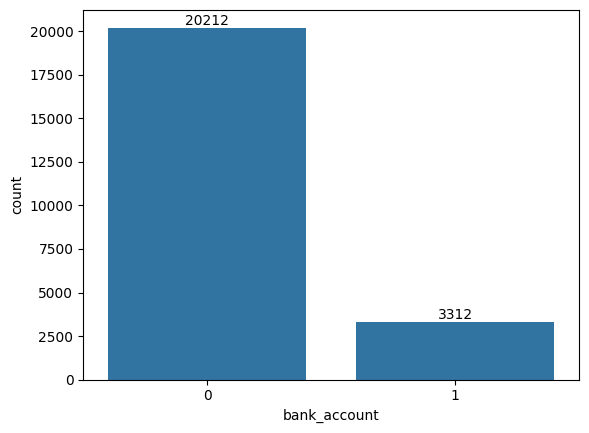

In [172]:
fig = sns.countplot(x = ds.bank_account)
fig.bar_label(fig.containers[0])

[Text(0, 0, '16169'), Text(0, 0, '16169')]

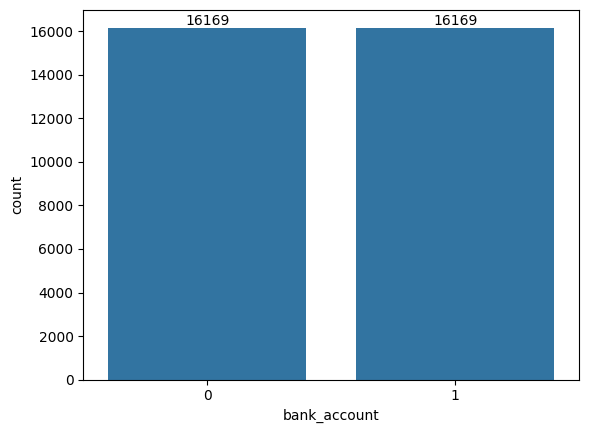

In [173]:
from imblearn.over_sampling import SMOTE

x = ds.drop('bank_account', axis = 1)
y = ds.bank_account

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 23)

smote = SMOTE(sampling_strategy= 'auto', random_state=5)
X_resampled, y_resampled = smote.fit_resample(xtrain, ytrain)

fig = sns.countplot(x = y_resampled)
fig.bar_label(fig.containers[0])

In [174]:
log_reg = LogisticRegression()

log_reg.fit(X_resampled, y_resampled)

cross_validation = log_reg.predict(X_resampled)
print(classification_report(cross_validation,y_resampled))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72     16269
           1       0.72      0.73      0.72     16069

    accuracy                           0.72     32338
   macro avg       0.72      0.72      0.72     32338
weighted avg       0.72      0.72      0.72     32338



In [175]:
pred = log_reg.predict(xtest) 
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83      3220
           1       0.68      0.30      0.42      1485

    accuracy                           0.73      4705
   macro avg       0.71      0.62      0.62      4705
weighted avg       0.72      0.73      0.70      4705



In [176]:
model = joblib.dump(log_reg, open('FinancialModell.pkl','wb'))